<a href="https://colab.research.google.com/github/RahulKhurana-16/Celebrity-Lookup/blob/main/look_alike_celeb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cmake
!pip install dlib
!pip install face-recognition

     |████████████████████████████████| 100.2MB 64kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=93039234095f2192d96cfa113be5ad36ab94e98ae0f6e32f969c78b5f1cffed0
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import dlib
import face_recognition
import os
import numpy as np
from IPython.display import Image

In [ ]:
# Load Images and face embeddings 

def load_images(known_images_dir):
    known_encodings = []
    known_images = []

    for file in os.listdir(known_images_dir):
        filename = os.fsdecode(file)
        image = face_recognition.load_image_file(os.path.join(known_images_dir, filename))
        
        enc = face_recognition.face_encodings(image)
        if len(enc) > 0:
            known_encodings.append(enc[0])
            known_images.append(filename)
        
    return (known_encodings, known_images)

In [ ]:
# Calculate Euclidean Distance

def calculate_face_distance(known_encodings, unknown_img_path, cutoff=0.5, num_results=4):
    # Load a test image and get encondings for it
    image_to_test = face_recognition.load_image_file(unknown_img_path)
    image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

    # See how far apart the test image is from the known faces
    face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)
    return (unknown_img_path, known_images[face_distances.argmin()])

In [ ]:
path="/content/drive/MyDrive/Dataset/Look_alike_cleb/images"
known_encodings, known_images = load_images(path)

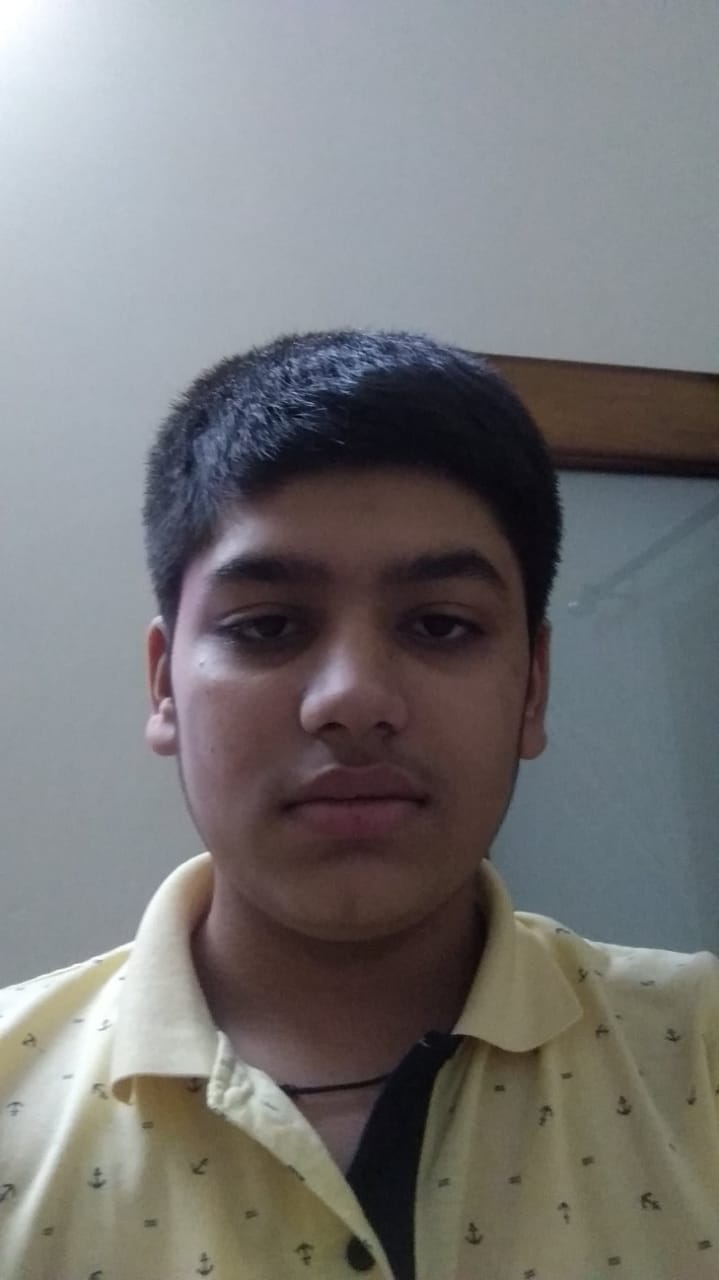

In [ ]:
original_image = "/content/drive/MyDrive/Dataset/Look_alike_cleb/test/test3.jpeg"
Image(filename=original_image)

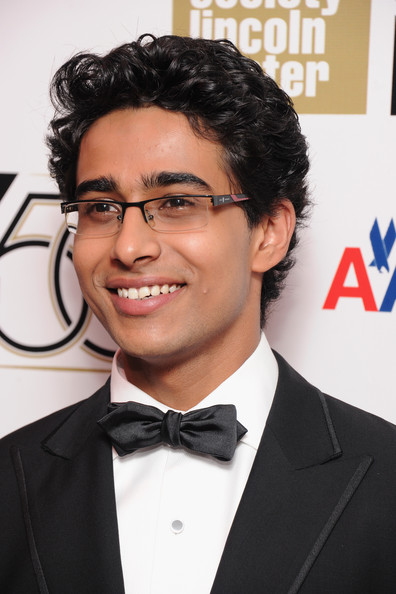

In [ ]:
matching_image = calculate_face_distance(known_encodings, original_image)[1]
Image(filename='/content/drive/MyDrive/Dataset/Look_alike_cleb/images/{}'.format(matching_image))